# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [1]:
# Импорт основных библиотек
import numpy as np
import pandas as pd
import psycopg2

In [2]:
# Подключение к базе данных PostgreSQL
conn = psycopg2.connect(**{'host': 'dsstudents.skillbox.ru', 
                           'port': 5432, 
                           'dbname': 'human_resources', 
                           'user': 'readonly', 
                           'password': '6hajV34RTQfmxhS'})

In [3]:
# Получение информации о структуре таблицы hr_dataset
hr_df = pd.read_sql_query('select * from hr_dataset', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   310 non-null    int64  
 1   Employee Name        310 non-null    object 
 2   Employee Number      310 non-null    int64  
 3   marriedid            310 non-null    int64  
 4   maritalstatusid      310 non-null    int64  
 5   genderid             310 non-null    int64  
 6   empstatus_id         310 non-null    int64  
 7   deptid               310 non-null    int64  
 8   perf_scoreid         310 non-null    int64  
 9   age                  310 non-null    int64  
 10  Pay Rate             310 non-null    float64
 11  state                310 non-null    object 
 12  zip                  310 non-null    int64  
 13  dob                  310 non-null    object 
 14  sex                  310 non-null    object 
 15  maritaldesc          310 non-null    obj

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
# Получение информации о структуре таблицы production_staff
pd.read_sql_query('select * from production_staff', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   256 non-null    int64  
 1   Employee Name        209 non-null    object 
 2   Race Desc            209 non-null    object 
 3   Date of Hire         209 non-null    object 
 4   TermDate             83 non-null     object 
 5   Reason for Term      209 non-null    object 
 6   Employment Status    209 non-null    object 
 7   Department           209 non-null    object 
 8   Position             209 non-null    object 
 9   Pay                  209 non-null    object 
 10  Manager Name         209 non-null    object 
 11  Performance Score    209 non-null    object 
 12  Abutments/Hour Wk 1  208 non-null    float64
 13  Abutments/Hour Wk 2  208 non-null    float64
 14  Daily Error Rate     208 non-null    float64
 15  90-day Complaints    208 non-null    flo

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
# Получение информации о структуре таблицы recruiting_cost
pd.read_sql_query('select * from recruiting_costs', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 22 non-null     int64 
 1   Employment Source  22 non-null     object
 2   January            22 non-null     int64 
 3   February           22 non-null     int64 
 4   March              22 non-null     int64 
 5   April              22 non-null     int64 
 6   May                22 non-null     int64 
 7   June               22 non-null     int64 
 8   July               22 non-null     int64 
 9   August             22 non-null     int64 
 10  September          22 non-null     int64 
 11  October            22 non-null     int64 
 12  November           22 non-null     int64 
 13  December           22 non-null     int64 
 14  Total              22 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 2.7+ KB


C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
# Получение информации о структуре таблицы salary_grid
pd.read_sql_query("select * from salary_grid", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          12 non-null     int64  
 1   Position    12 non-null     object 
 2   Salary Min  12 non-null     int64  
 3   Salary Mid  12 non-null     int64  
 4   Salary Max  12 non-null     int64  
 5   Hourly Min  12 non-null     float64
 6   Hourly Mid  12 non-null     float64
 7   Hourly Max  12 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 896.0+ bytes


C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
# Получение из базы данных информации по сотрудникам компании
sql_query = '''
    select hr.age, pr."Daily Error Rate" as daily_error_rate
    from hr_dataset hr 
    left join production_staff pr on 
        (hr."Employee Name" = pr."Employee Name") and (hr."Date of Hire" = pr."Date of Hire") and 
        (hr.position = pr."Position")'''

staff_df = pd.read_sql_query(sql_query, conn).fillna(0)

# Определение возрастных групп сотрудников компании
age_range = pd.cut(staff_df['age'], [0, 30, 50, 80])

# Вывод среднего числа ежедневных ошибок, приходящееся на каждого сотрудника для каждой возрастной группы
staff_df.pivot_table(values='daily_error_rate', index=age_range, aggfunc=np.mean)

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,daily_error_rate
age,
"(0, 30]",0.372549
"(30, 50]",0.638393
"(50, 80]",0.714286


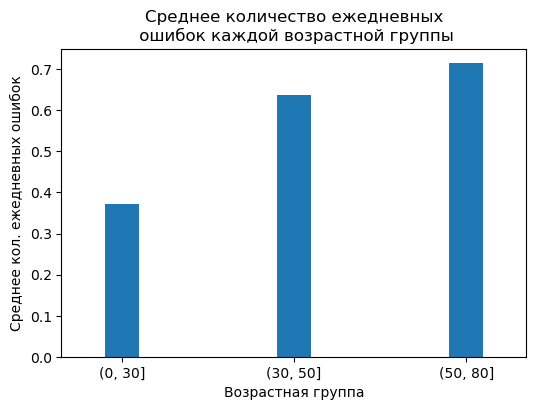

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(6, 4))

# Отражение среднего количества ежедневных ошибок каждой возрастной группы
staff_df.pivot_table(values='daily_error_rate', index=age_range, aggfunc=np.mean).plot.bar(
    ax=ax, width=0.2, title='Среднее количество ежедневных\n ошибок каждой возрастной группы', rot=0, legend=None)

# Вывод подписей осей координат
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Среднее кол. ежедневных ошибок')

plt.show()

In [9]:
# Получение из базы данных информации по сотрудникам компании
sql_query = 'select age, "Pay Rate" as pay_rate from hr_dataset'
staff_df = pd.read_sql_query(sql_query, conn).fillna(0)

# Вывод медианы оплаты труда сотрудников для каждой возрастной группы
staff_df.pivot_table(values='pay_rate', index=age_range, aggfunc=np.median)

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,pay_rate
age,
"(0, 30]",28.00
"(30, 50]",23.25
"(50, 80]",26.00


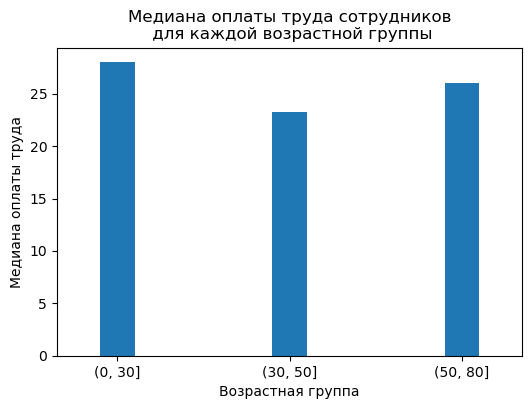

In [10]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(6, 4))

# Отражение медианы оплаты труда сотрудников для каждой возрастной группы
staff_df.pivot_table(values='pay_rate', index=age_range, aggfunc=np.median).plot.bar(
    ax=ax, width=0.2, title='Медиана оплаты труда сотрудников\n для каждой возрастной группы', rot=0, legend=None)

# Вывод подписей осей координат
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Медиана оплаты труда')

plt.show()

In [11]:
# Получение из базы данных информации по сотрудникам компании
sql_query = 'select age, "Days Employed" as days_employed from hr_dataset'
staff_df = pd.read_sql_query(sql_query, conn).fillna(0)

# Вывод медианы длительности работы сотрудника в компании для каждой возрастной группы
staff_df.pivot_table(values='days_employed', index=age_range, aggfunc=np.median)

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,days_employed
age,
"(0, 30]",1112
"(30, 50]",1291
"(50, 80]",1238


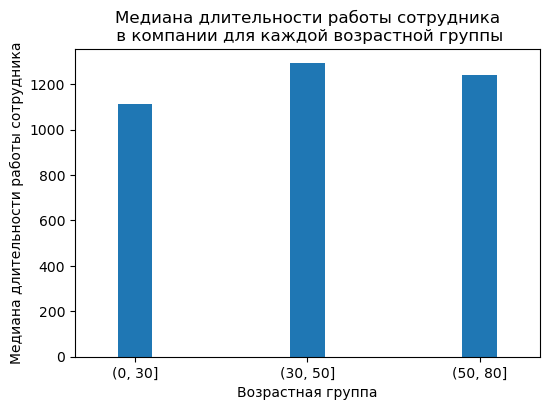

In [12]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(6, 4))

# Отражение медианы длительности работы сотрудника в компании для каждой возрастной группы
staff_df.pivot_table(values='days_employed', index=age_range, aggfunc=np.median).plot.bar(
    ax=ax, width=0.2, title='Медиана длительности работы сотрудника\n в компании для каждой возрастной группы', 
    rot=0, legend=None)

# Вывод подписей осей координат
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Медиана длительности работы сотрудника')

plt.show()

In [13]:
# Получение из базы данных информации по сотрудникам компании
sql_query = '''
    select hr.citizendesc, pr."Daily Error Rate" as daily_error_rate
    from hr_dataset hr 
    left join production_staff pr on 
        (hr."Employee Name" = pr."Employee Name") and (hr."Date of Hire" = pr."Date of Hire") and 
        (hr.position = pr."Position")'''

staff_df = pd.read_sql_query(sql_query, conn).fillna(0)

# Вывод среднего числа ежедневных ошибок у групп сотрудников из категории "citizendesc"
staff_df.pivot_table(values='daily_error_rate', index='citizendesc', aggfunc=np.mean)

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,daily_error_rate
citizendesc,
Eligible NonCitizen,0.750000
Non-Citizen,1.250000
US Citizen,0.588435


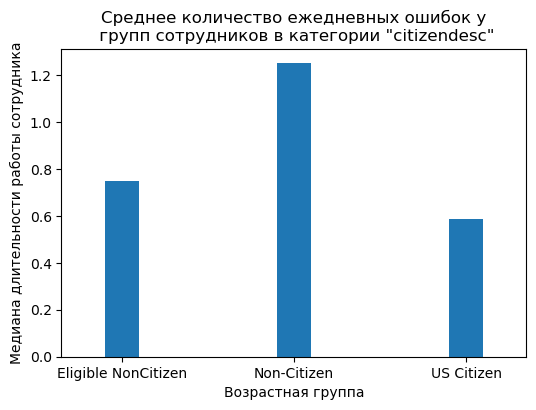

In [14]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(6, 4))

# Отражение среднего числа ежедневных ошибок у групп сотрудников из категории "citizendesc"
staff_df.pivot_table(values='daily_error_rate', index='citizendesc', aggfunc=np.mean).plot.bar(
    ax=ax, width=0.2, title='Среднее количество ежедневных ошибок у\n групп сотрудников в категории "citizendesc"', 
    rot=0, legend=None)

# Вывод подписей осей координат
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Медиана длительности работы сотрудника')

plt.show()


Все рассмотренные гипотезы подтвердились, кроме одной - "Сотрудники среднего возраста - самые высокооплачиваемые сотрудники". Согласно проведенного анализа по данной гипотезе, наибольший заработок получают сотрудники из возрастной группы не старше 30.

В качестве рекомендации по стратегии набора персонала, можно рекомендовать следующий портрет идеального сотрудника:

1. согласно гипотезам 1-3, сотрудник должен быть из группы среднего возраста (от 30 до 50), так как в работе допускает количество ежедневных ошибок в пределах среднего, получает наименьший заработок и меньше всего подвержен частым сменам работы;

2. согласно гипотезе 4, сотрудник должен быть гражданином Соединенных Штатов Америки, так как более добросовестно выполняет работу и меньше допускает ежедневных ошибок.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).